# Unit Hydrograph - lecture

- toc: true 
- badges: true
- comments: false
- categories: [jupyter]

## Linear reservoir model

![](hydrology_figures/dingman-box10.3.png)

![](hydrology_figures/hyetograph_hydrograph1.png)

![](hydrology_figures/hyetograph_hydrograph2.png)

![](hydrology_figures/hyetograph_hydrograph3.png)

![](hydrology_figures/hyetograph_hydrograph3b.png)

## Rainfall-Runoff Models

### The Rational Method
The rational method postulates a simple proportionality between peak discharge, $q_{pk}$, and rainfall intensity, $p^*$:

$$
q_{pk} = \varepsilon_R \cdot C_R \cdot A_D \cdot p^*
$$

* $q_{pk}$: peak discharge (m$^3$/s)
* $\varepsilon_R=0.278$: unit-conversion factor
* $C_R$: dimensionless runoff coefficient
* $A_D$: drainage area (km$^2$)
* $p^*$: rainfall intensity (mm/h)

> Obviously the results obtained with the method are highly sensitive to the value chosen for CR; values range from 0.05 for gently sloping lawns up to 0.95 for highly urbanized areas of roofs and pavement.  
The rational method is widely used in urban drainage design, but Pilgrim and Cordery (1992) caution that there are typically few data available to guide the selection of CR, and that CR for a given watershed may vary widely from storm to storm due to differing antecedent conditions.

### The Soil Conservation Service Curve-Number Method (SCS-CN)

Also called NRCS curve number procedure. NRCS = Natural Resources Conservation Service - USDA

$$
Q^* = P^* = \frac{\left( P-S_{I} \right)^2}{P-S_I+S_{max}}
$$

The initial abstraction $S_I$ is usually approximated as $0.2\cdot S_{max}$, therefore:

$$
Q^* = P^* = \frac{\left( P-0.2\cdot S_{max} \right)^2}{P+0.8\cdot S_{max}}
$$

$$
S_{max} = 25.4\left(\frac{1000}{CN}-10\right)
$$

The number 25.4 is a conversion factor from inches to millimeters.

![](hydrology_figures/dingman-figure10.51.png)

![](hydrology_figures/ward-figure5.15.png)


The curve number (CN) is a function of the ability of soils to infiltrate water, land use, and the soil water conditions at the start of a rainfall event (antecedent soil water condition). To account for the infiltration character- istics of soils, the NRCS has divided soils into four hydrologic soil groups, which are defined as follows (NRCS, 1984):

* **Group A** (low runoff potential): Soils with high infiltration rates even when thoroughly wetted. These consist chiefly of deep, well-drained sands and gravels. These soils have a high rate of water transmission (final infiltration rate greater than 0.3 in./h).
* **Group B**: Soils with moderate infiltration rates when thoroughly wetted. These consist chiefly of soils that are moderately deep to deep, moderately well drained to well drained with moderately fine to moderately coarse textures. These soils have a moderate rate of water transmission (final infil- tration rate 0.15 to 0.30 in./h).
* **Group C**: Soils with slow infiltration rates when thoroughly wetted. These consist chiefly of soils with a layer that impedes downward movement of water or soils with moderately fine to fine texture. These soils have a slow rate of water transmission (final infiltration rate 0.05 to 0.15 in./h).
* **Group D** (high runoff potential): Soils with very slow infiltration rates when thoroughly wetted. These consist chiefly of clay soils with a high swelling potential, soils with a permanent high water table, soils with a claypan or clay layer at or near the surface, and shallow soils over nearly impervious materials. These soils have a very slow rate of water transmission (final infiltration rate less than 0.05 in./h).

There are also three categories for Antecedent Soil Moisture Condition (AMC):
* **AMC I**: Dormant season antecedent soil moisture less than 0.5 in. Growing season antecedent soil moisture less than 1.4 in.
* **AMC II**: Dormant season antecedent soil moisture between 0.5 and 1.1 in. Growing season anteced- ent soil moisture between 1.4 and 2.1 in.
* **AMC III**: Dormant season antecedent soil mois- ture greater than 1.1 in. Growing season anteced- ent soil moisture greater than 2.1 in.

See the table below to find curve numbers for AMC II:
![](hydrology_figures/ward-table5.1.png)

In [41]:
P=21
ratio = 4.17e4/2.61e5
CN=86
Smax = 25.4 * (1000/CN - 10)
Pmin = 0.2 * Smax
Qstar = 0.0
if P > Pmin:
    Qstar = (P - 0.2*Smax)**2 / (P+0.8*Smax)
Qstar/P

0.14270006393832066

In [9]:
ratio

0.15977011494252874

In [12]:
Qstar / P

0.9148811393863234

<IPython.core.display.Javascript object>


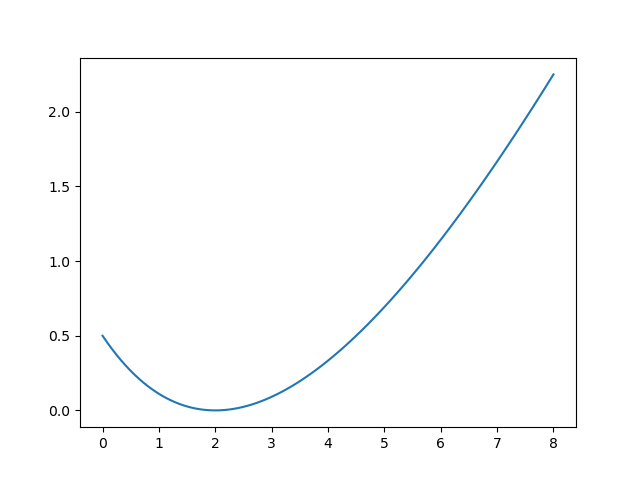

In [33]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

def Qstar_f(pe, CN):
#     Smax = 25.4*(1000/CN - 10)
    Smax = (1000/CN - 10)
#     Smax = (1000/CN - 10) / 25.4
    Qstar = (pe - 0.2*Smax)**2 / (pe+0.8*Smax)
    return Qstar

pe = np.linspace(0,8,101)
# plt.plot(pe, Qstar_f(pe, 35))
plt.plot(pe, Qstar_f(pe, 50))
# plt.plot(pe, Qstar_f(pe, 85))

In [22]:
8*25.4

203.2